# –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞ ‚Ññ 1. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–ê–≤—Ç–æ—Ä: –ê—Ä—Ç—ë–º –ú–∞–∫–∞—Ä–æ–≤
–ì—Ä—É–ø–ø–∞: –ö–ò20-16/2–±
–í–∞—Ä–∏–∞–Ω—Ç 8

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import sigmaclip


In [75]:
df = pd.read_excel('data/first_practice_dataframe.xlsx')
df = df[['cat15_programmingLanguage',
         'cat4_income', 'num1_9', 'num2_9', 'num3_9']]
df

cat15_programmingLanguage         cat4_income       num1_9       num2_9  \
0                         C++   $40,001 - $50,000    38.394563  -310.892227   
1                         C++   $40,001 - $50,000 -9999.000000   -68.997463   
2                         C++   $40,001 - $50,000   441.196689   450.783312   
3                         C++       Below $30,001   210.914486   202.884884   
4                         C++                   -  -285.346725          NaN   
..                        ...                 ...          ...          ...   
995                        js  $30,001 - $40,000    824.065303   426.900079   
996                       C++       Below $30,001   288.392553  1426.635214   
997                      Java  $30,001 - $40,000    -14.932614   471.835574   
998                         c       Below $30,001   374.417925   480.725687   
999                    Python       Below $30,001  -182.579076   369.474244   

         num3_9  
0    475.769166  
1    333.541193  
2    450.809984  
3    442.997016  
4    376.479737  
..          ...  
995  393.041594  
996  258.163126  
997         NaN  
998   269.02597  
999  386.110874  

[1000 rows x 5 columns]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cat15_programmingLanguage  981 non-null    object 
 1   cat4_income                980 non-null    object 
 2   num1_9                     1000 non-null   float64
 3   num2_9                     952 non-null    float64
 4   num3_9                     970 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [77]:
df['cat15_programmingLanguage'].unique()

array(['C++', 'c', 'Python', 'Java', 'C', '-', 'js', ' ', nan],
      dtype=object)

In [78]:
df['cat4_income'].unique()

array(['$40,001 - $50,000', 'Below $30,001', '-', '$30,001 - $40,000 ',
       ' ', 'below $30,001', nan, '$50,001 and'], dtype=object)

In [79]:
df2 = df.copy()

## –ó–∞–¥–∞–Ω–∏–µ 1, 2

–í–∏–∑—É–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö. –ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≤–∏–∑—É–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ (–ø—Ä–∏–∑–Ω–∞–∫–∞) –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö. –ü—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∏–∞–≥—Ä–∞–º–º –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã —Å—Ç–æ–ª–±—á–∞—Ç–∞—è –∏ –∫—Ä—É–≥–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º—ã, –¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö ‚Äì –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞, –æ—Ü–µ–Ω–∫–∞ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –¥–∏–∞–≥—Ä–∞–º–º–∞ ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏¬ª.

–ü—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–æ–≤–µ—Ä–∫—É –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω–æ—Å—Ç–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω–æ—Å—Ç–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–æ–ª–∂–Ω–∞ –≤–∫–ª—é—á–∞—Ç—å –ø—Ä–æ–≤–µ—Ä–∫—É —Ç–∏–ø–æ–≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤, –Ω–µ–≤–æ–∑–º–æ–∂–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ —Ç.–ø. –ü—Ä–∏–≤–µ—Å—Ç–∏ –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫ –Ω—É–∂–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

### –û–±—Ä–∞–±–æ—Ç–∫–∞

In [80]:
def data_processing(data: pd.core.frame.DataFrame, columns: list[str], dtype: str) -> pd.core.frame.DataFrame:
    """
    –§—É–Ω–∫—Ü–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö
    :param data: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :type data: pandas.core.frame.DataFrame
    :param columns: —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤
    :type columns: list[str]
    :param dtype: —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö
    :type dtype: string
    :return: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :rtype: pandas.core.frame.DataFrame
    """
    for column in columns:
        data[column] = data[column].replace({'-': None, ' ': None})
        if column in ['cat15_programmingLanguage', 'cat4_income']:
            data[column] = data[column].str.capitalize()
        if dtype == "float":
            data[column] = data[column].replace({-9999: np.nan})
        data[column] = data[column].astype(dtype)
    return data


In [81]:
data_processing(df2, ['cat15_programmingLanguage', 'cat4_income'], "category")
data_processing(df2, ['num1_9', 'num2_9', 'num3_9'], "float")
data_processing(df, ['num3_9'], "float")
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   cat15_programmingLanguage  941 non-null    category
 1   cat4_income                941 non-null    category
 2   num1_9                     951 non-null    float64 
 3   num2_9                     952 non-null    float64 
 4   num3_9                     912 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 25.9 KB


In [82]:
df2['cat15_programmingLanguage'].unique()

['C++', 'C', 'Python', 'Java', NaN, 'Js']
Categories (5, object): ['C', 'C++', 'Java', 'Js', 'Python']

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤

In [83]:
def graphs_for_categories(data: pd.core.frame.DataFrame, column: str) -> None:
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    :param data: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :type data: pandas.core.frame.DataFrame
    :param column: –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞
    :type column: string
    :rtype: void
    """
    counts = Counter(data[column].dropna())
    figure, axis = plt.subplots(1, 2, figsize=(22, 10))
    axis[0].bar(counts.keys(), counts.values())
    axis[0].set_title(f'BarPlot –¥–ª—è {column}')

    counts = Counter(data[column].dropna())
    axis[1].pie(counts.values(), labels=counts.keys())
    axis[1].set_title(f'PiePlot –¥–ª—è {column}')
    plt.show()


def graphs_for_num(data: pd.core.frame.DataFrame, column: str) -> None:
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    :param data: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :type data: pandas.core.frame.DataFrame
    :param column: –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞
    :type column: string
    :rtype: void
    """
    figure, axis = plt.subplots(1, 2, figsize=(22, 10))
    sns.histplot(data[column], kde=True, color='blue', ax=axis[0])
    axis[0].set_title(f'–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –¥–ª—è {column}')
    plt.xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

    sns.boxplot(data=data[column], ax=axis[1])
    axis[1].set_title(f'–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è {column}')
    plt.show()


#### –î–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö

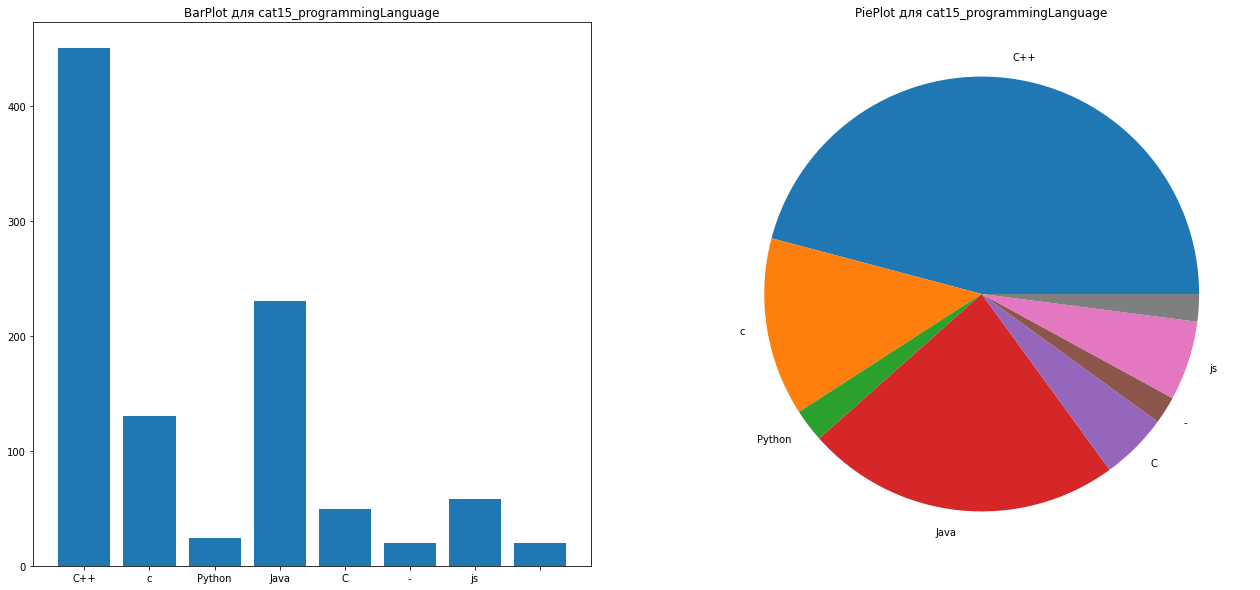

In [84]:
graphs_for_categories(df, 'cat15_programmingLanguage')

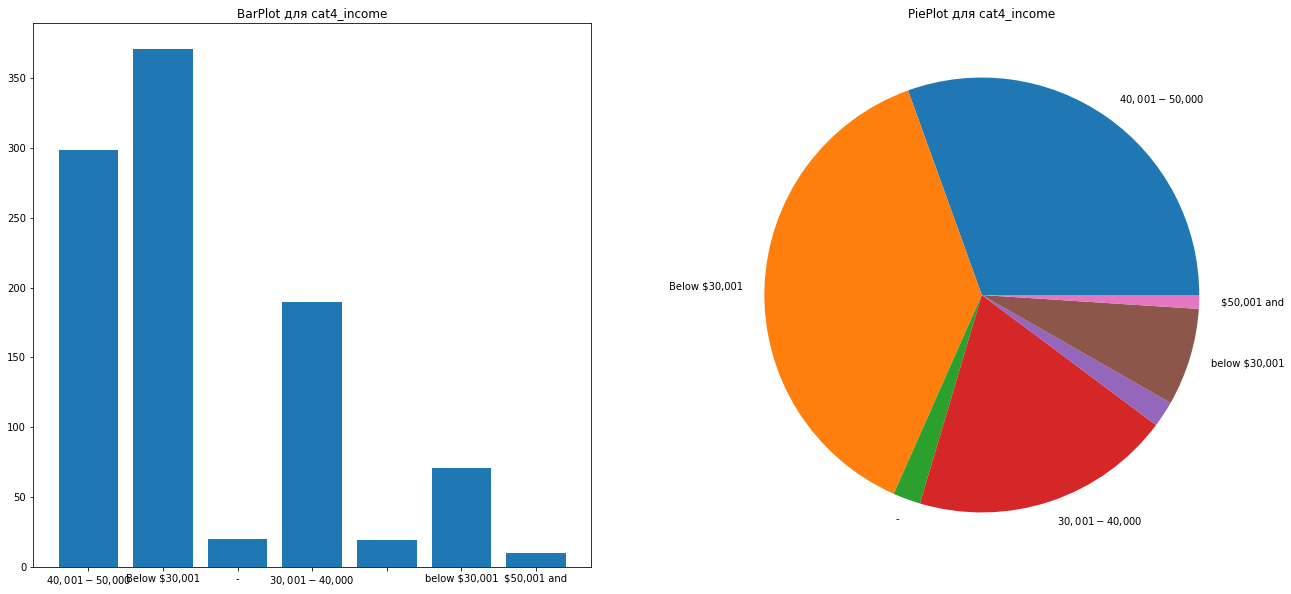

In [85]:
graphs_for_categories(df, 'cat4_income')

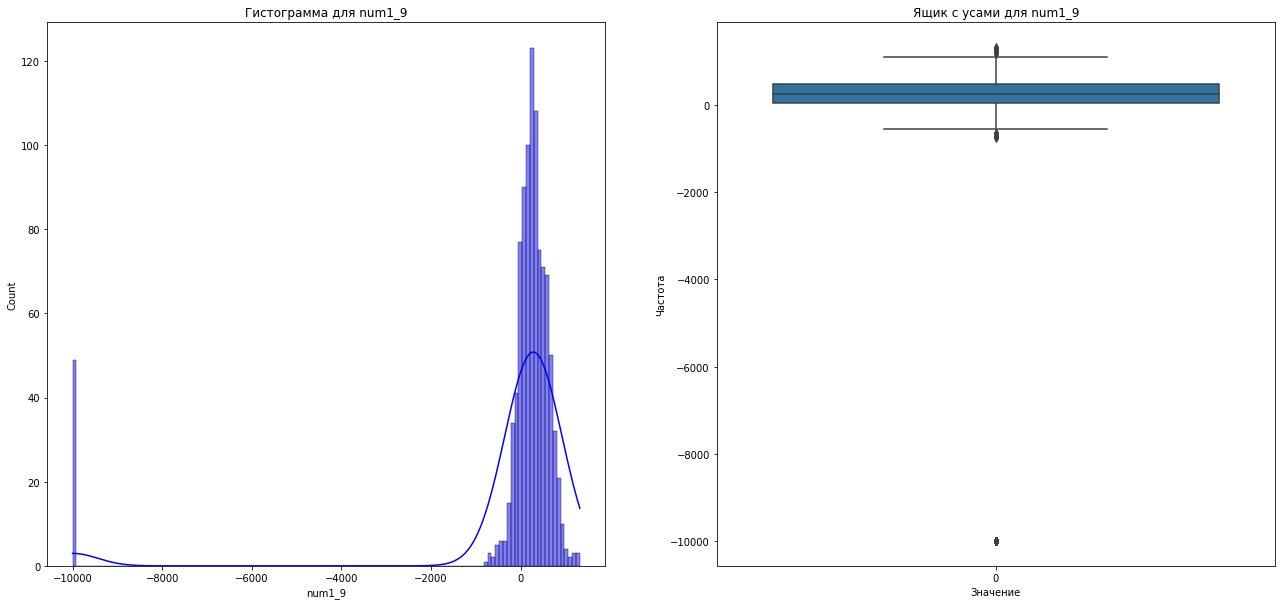

In [86]:
graphs_for_num(df, 'num1_9')

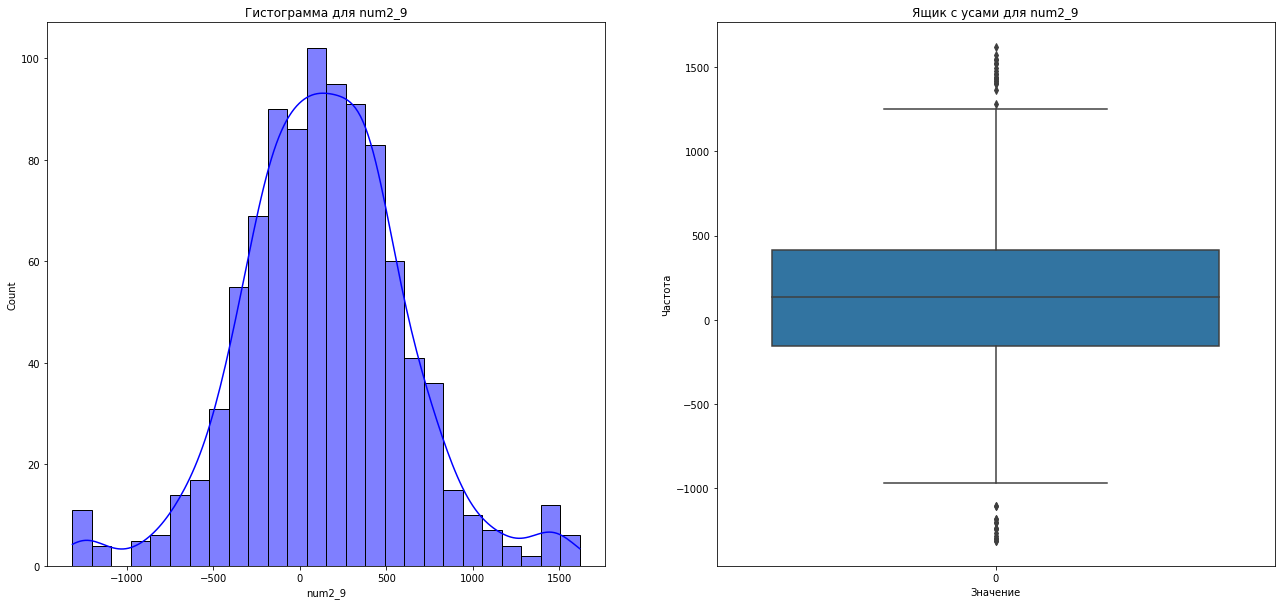

In [87]:
graphs_for_num(df, 'num2_9')

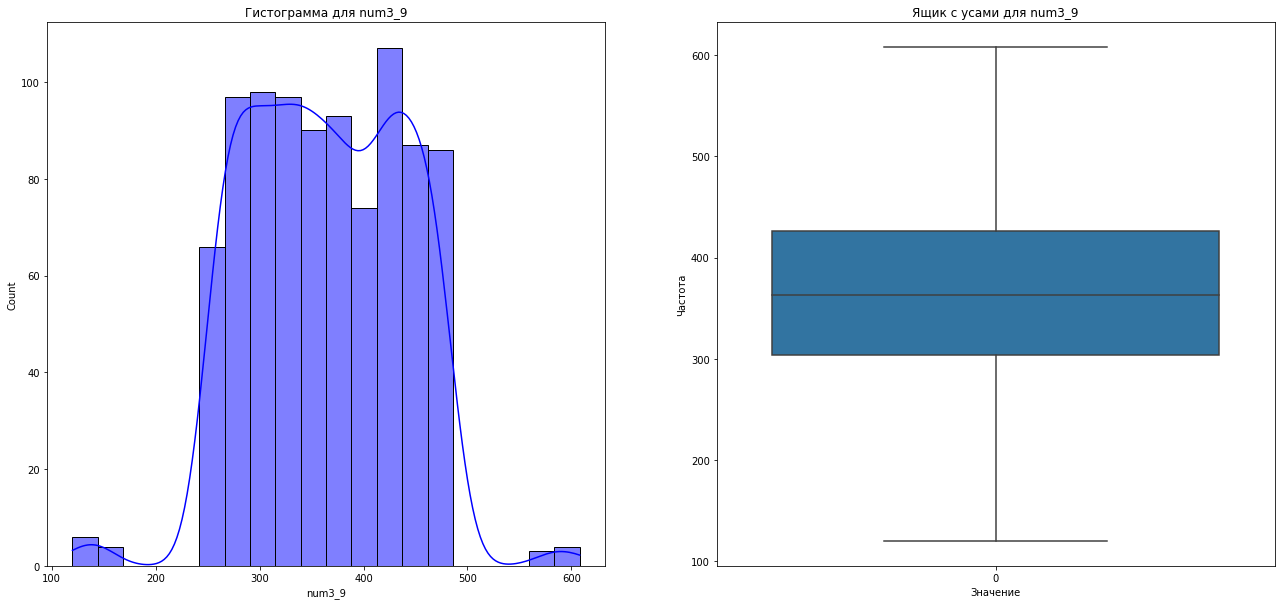

In [88]:
graphs_for_num(df, 'num3_9')

#### –ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö

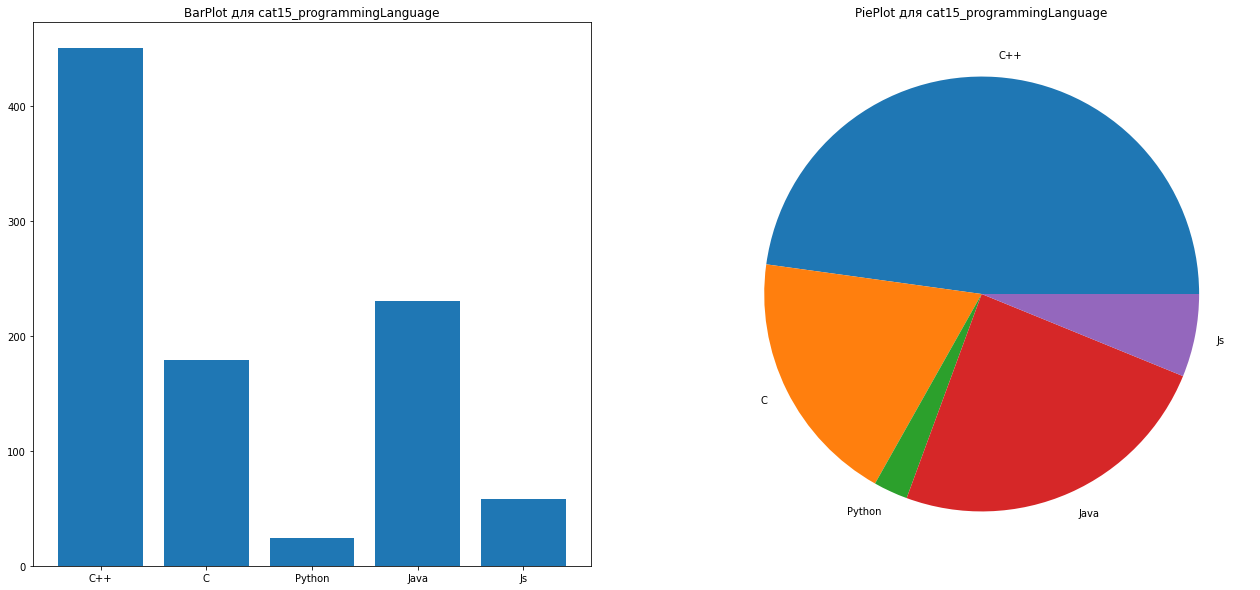

In [89]:
graphs_for_categories(df2, 'cat15_programmingLanguage')

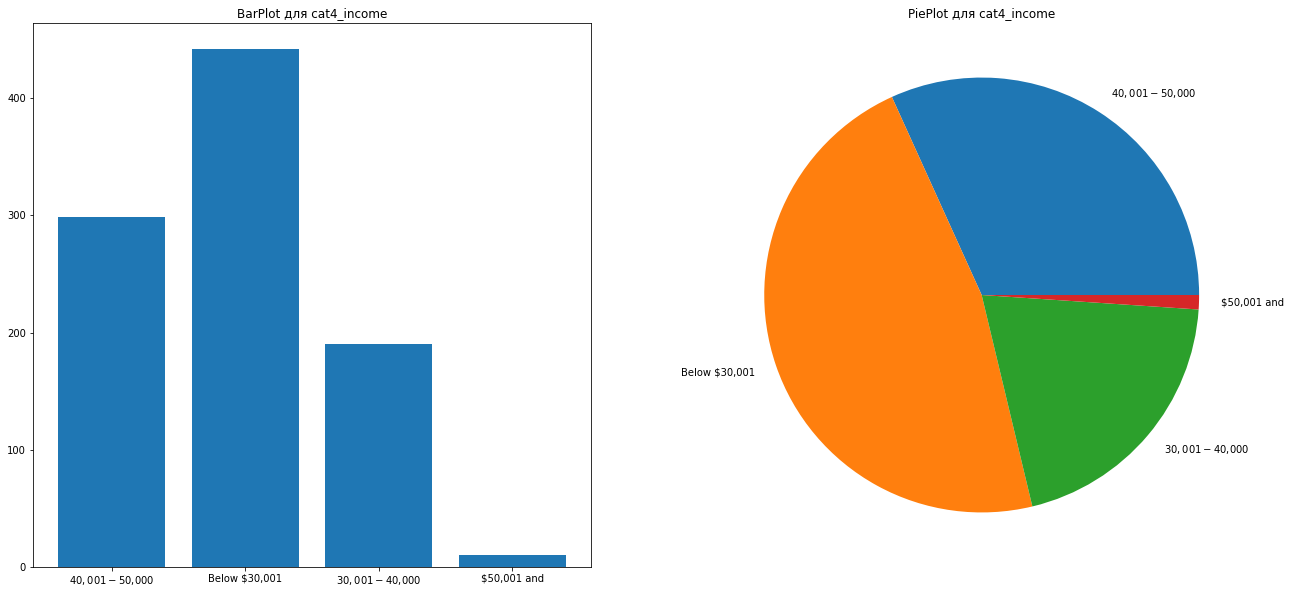

In [90]:
graphs_for_categories(df2, 'cat4_income')

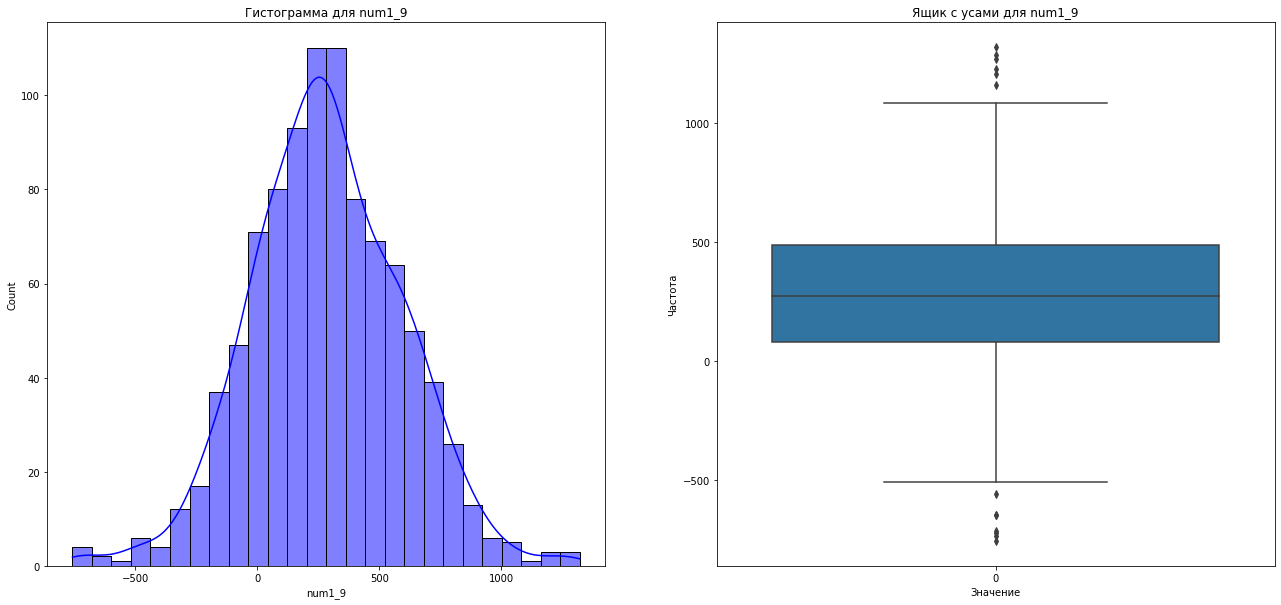

In [91]:
graphs_for_num(df2, 'num1_9')

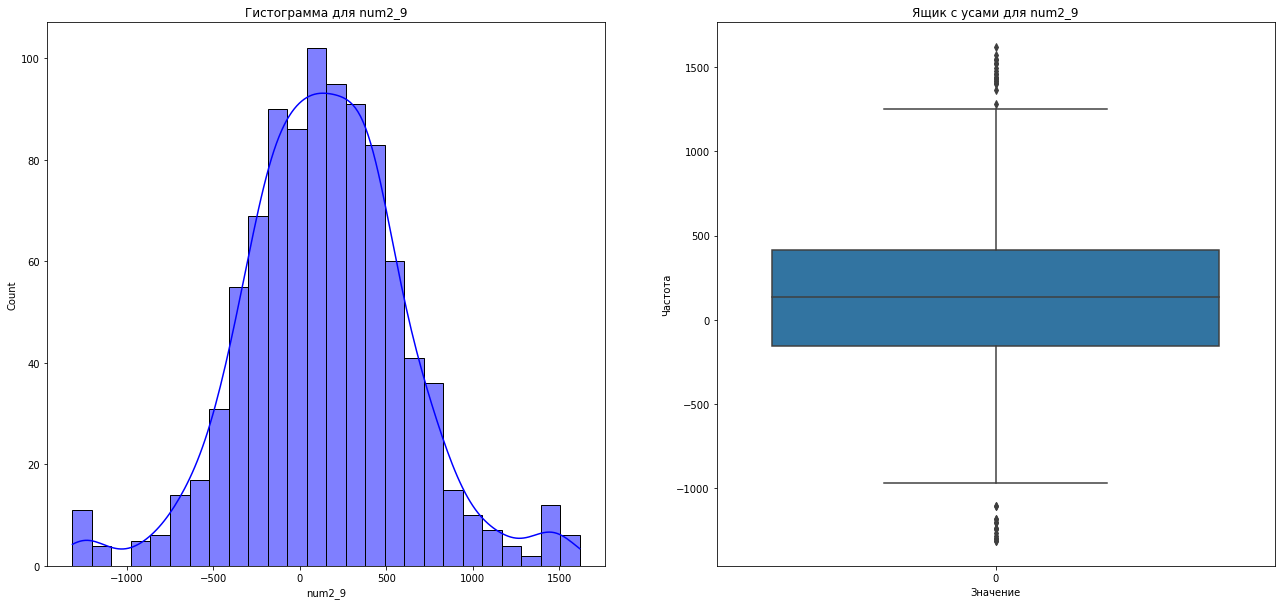

In [92]:
graphs_for_num(df2, 'num2_9')

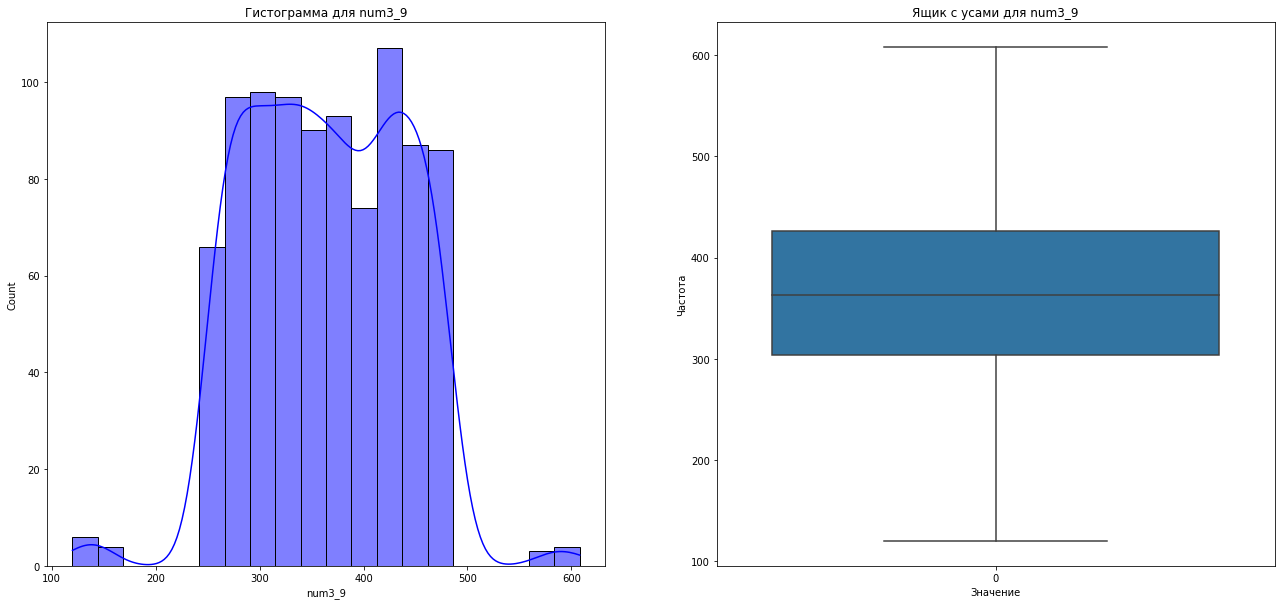

In [93]:
graphs_for_num(df2, 'num3_9')

## –ó–∞–¥–∞–Ω–∏–µ 3. –ü–æ–∏—Å–∫ –∞–Ω–æ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

–ü—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–∏—Å–∫ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö, —Ä–µ–∑–∫–æ –æ—Ç–ª–∏—á–∞—é—â–∏—Ö—Å—è –æ—Ç –¥—Ä—É–≥–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π (–≤—ã–±—Ä–æ—Å–æ–≤). –°—Ç—Ä–æ–∫–∏ —Å –Ω–∞–π–¥–µ–Ω–Ω—ã–º–∏ –≤—ã–±—Ä–æ—Å–∞–º–∏ —É–¥–∞–ª–∏—Ç—å –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö. –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç–æ–¥–æ–º —Å–∏–≥–º (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é scipy.stats.sigmaclip) –∏–ª–∏ –º–µ—Ç–æ–¥ –∫–≤–∞—Ä—Ç–∏–ª–µ–π (—Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ). –ü—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª–∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ—á–∏—Å—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ —Å–∏–≥–º.

### –ú–µ—Ç–æ–¥ –∫–≤–∞—Ä—Ç–∏–ª–µ–π

In [94]:
def finding_outliers(data: pd.core.frame.DataFrame, columns: list[str]) -> pd.core.frame.DataFrame:
    """
    –§—É–Ω–∫—Ü–∏—è –ø–æ–∏—Å–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤
    :param data: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    :type data: pandas.core.frame.DataFrame
    :param column: —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤
    :type column: list[str]
    :return: –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤
    :rtype: pandas.core.frame.DataFrame
    """
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - IQR
        higher_fence = Q3 + IQR
        outlier_indexes = list()
        outlier_indexes.extend(data.index[(data[column] < lower_fence) | (data[column] > higher_fence)])
        data = data.drop(outlier_indexes)

        sns.boxplot(data=data[column])
        plt.title(f'Boxplot –¥–ª—è {column}')
        plt.show()
    return data


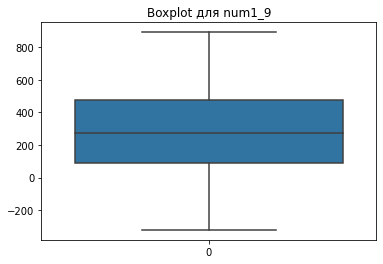

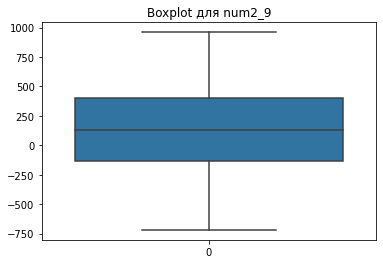

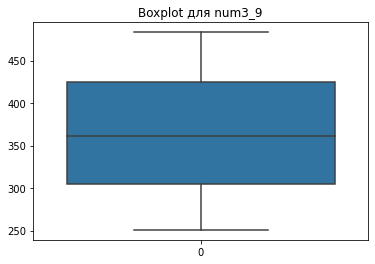

In [95]:
data = df2.copy()
df2 = finding_outliers(df2, ['num1_9', 'num2_9', 'num3_9'])

### –ú–µ—Ç–æ–¥ —Å–∏–≥–º

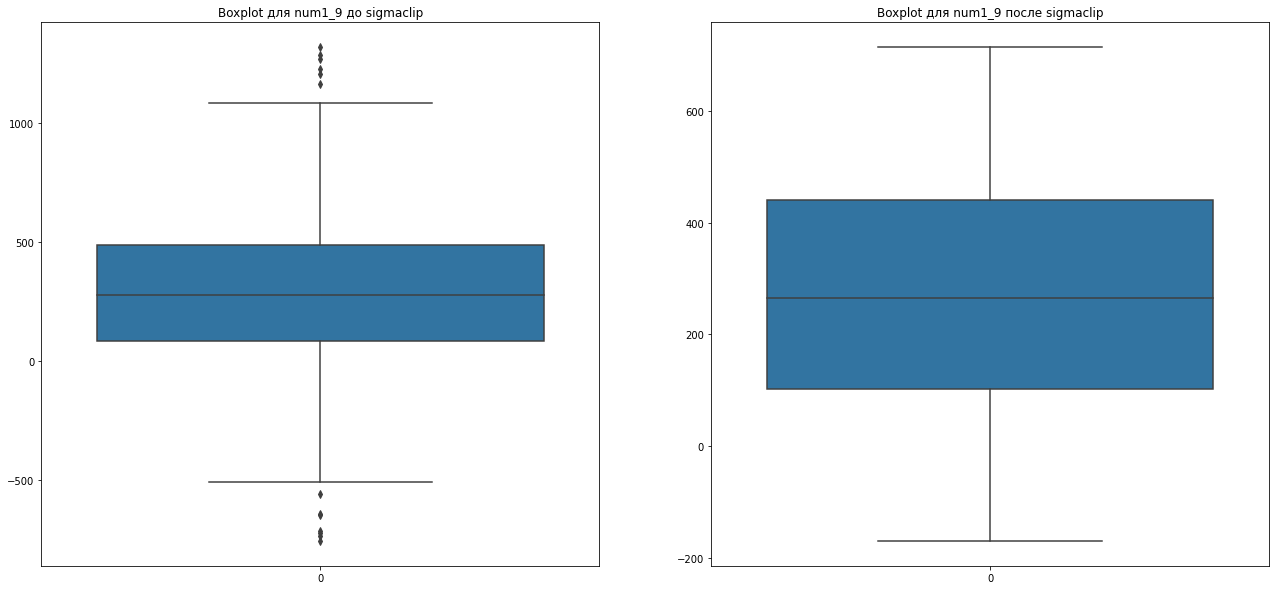

In [96]:
figure, axis = plt.subplots(1, 2, figsize=(22, 10))
sns.boxplot(data=data['num1_9'], ax=axis[0])
axis[0].set_title(f'Boxplot –¥–ª—è num1_9 –¥–æ sigmaclip')
modified_column, low, up = sigmaclip(
    data['num1_9'].dropna().to_list(), 2, 2)
sns.boxplot(data=modified_column, ax=axis[1])
axis[1].set_title(f'Boxplot –¥–ª—è num1_9 –ø–æ—Å–ª–µ sigmaclip')
plt.show()


–ü—Ä–æ–∏–Ω–¥–µ–∫—Å–∏—Ä—É–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∑–∞–Ω–æ–≤–æ

In [97]:
df2 = df2.reindex(range(0, df2['num1_9'].count()))

## –ó–∞–¥–∞–Ω–∏–µ 4. –ü–æ–∏—Å–∫ –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π

–ü—Ä–æ–≤–µ—Å—Ç–∏ –ø–æ–∏—Å–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –í—ã–≤–µ—Å—Ç–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –ø—Ä–æ–ø—É—Å–∫–∞–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –í–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ: –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ ùëò- –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π, –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–º–µ–Ω–∏—Ç—å —Å–∞–º—ã–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º, –¥–ª—è —Ç—Ä–µ—Ç—å–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –¥–ª—è —á–µ—Ç–≤–µ—Ä—Ç–æ–≥–æ ‚Äì –º–µ–¥–∏–∞–Ω—É, –¥–ª—è –ø—è—Ç–æ–≥–æ ‚Äì –º–µ—Ç–æ–¥ ¬´ùëò-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π¬ª. –î–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ—Ç–æ–¥–æ–º ¬´k –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π¬ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω—É –∏–∑ –≥–æ—Ç–æ–≤—ã—Ö —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn).

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞–ª–∏—á–∏–µ NaN –∑–Ω–∞—á–µ–Ω–∏–π

In [98]:
df2.isna().any(axis=1).sum()

301

–ó–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏

In [99]:
imputer = KNNImputer(n_neighbors=1)
most_popular_value = df2['cat15_programmingLanguage'].describe()['top']
df2['cat15_programmingLanguage'] = df2['cat15_programmingLanguage'].fillna(most_popular_value)
most_popular_value = df2['cat4_income'].describe()['top']
df2['cat4_income'] = df2['cat4_income'].fillna(most_popular_value)
df2[['num1_9']] = imputer.fit_transform(df2[['num1_9']])
df2['num2_9'] = df2['num2_9'].fillna(df2['num2_9'].median())
df2['num3_9'] = df2['num3_9'].fillna(df2['num3_9'].mean())

–ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞–ª–∏—á–∏–µ NaN –∑–Ω–∞—á–µ–Ω–∏–π

In [100]:
df2.isna().any(axis=1).sum()

0

–í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –ø–æ—Å–ª–µ –ø–æ–ª–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö

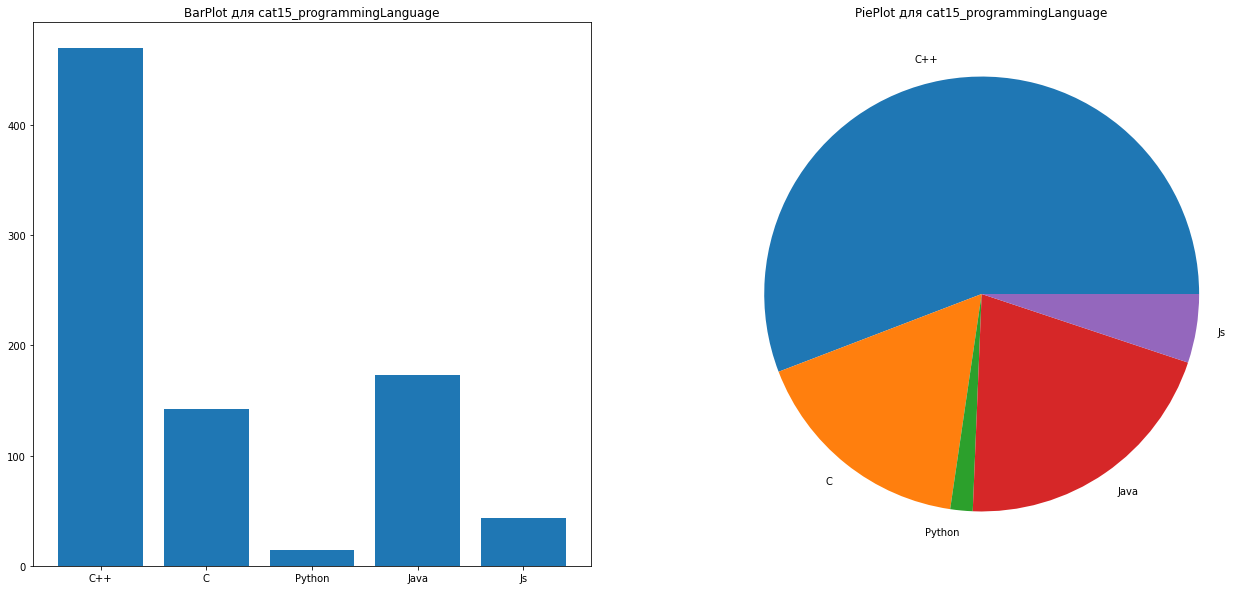

In [101]:
graphs_for_categories(df2, 'cat15_programmingLanguage')

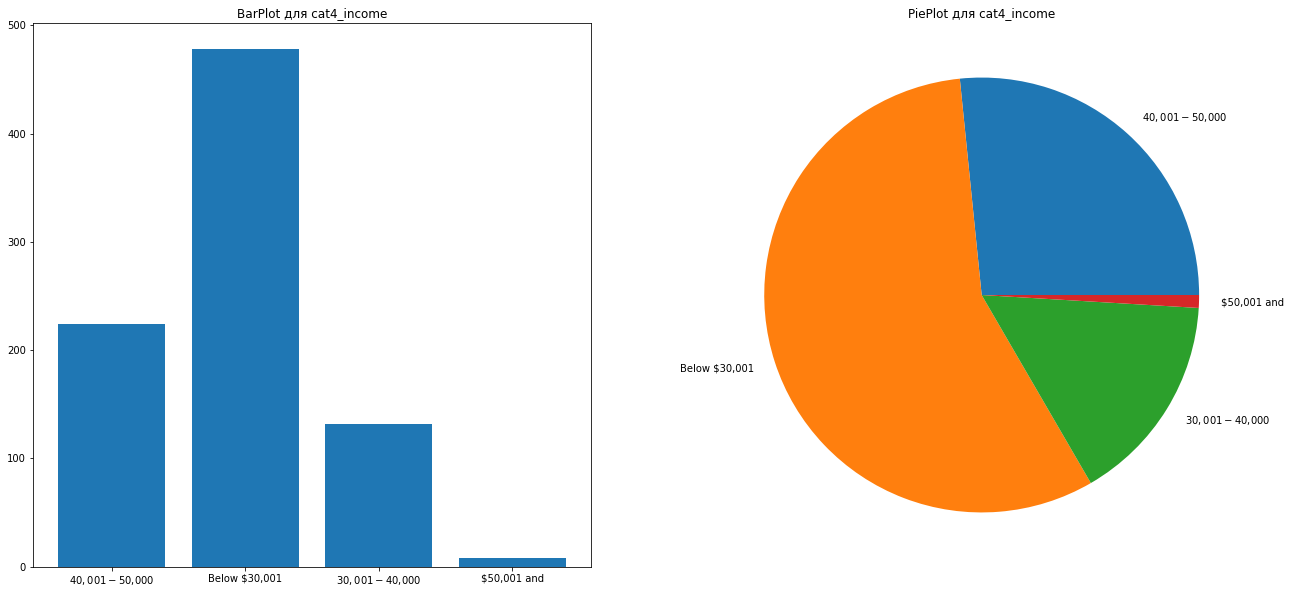

In [102]:
graphs_for_categories(df2, 'cat4_income')


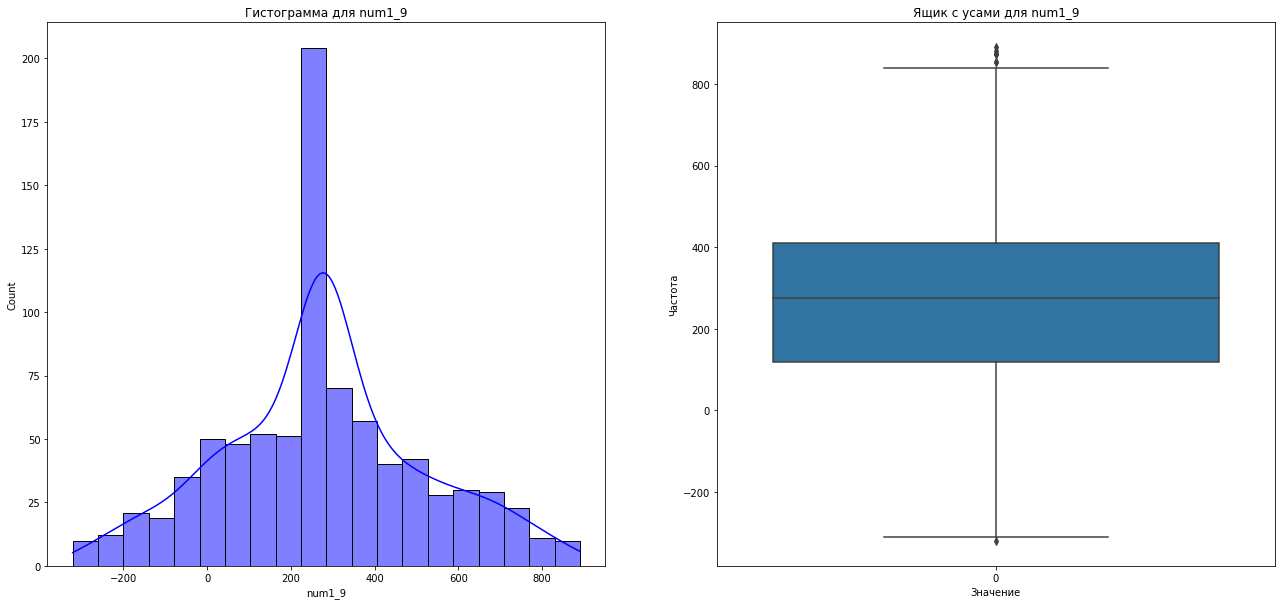

In [103]:
graphs_for_num(df2, 'num1_9')

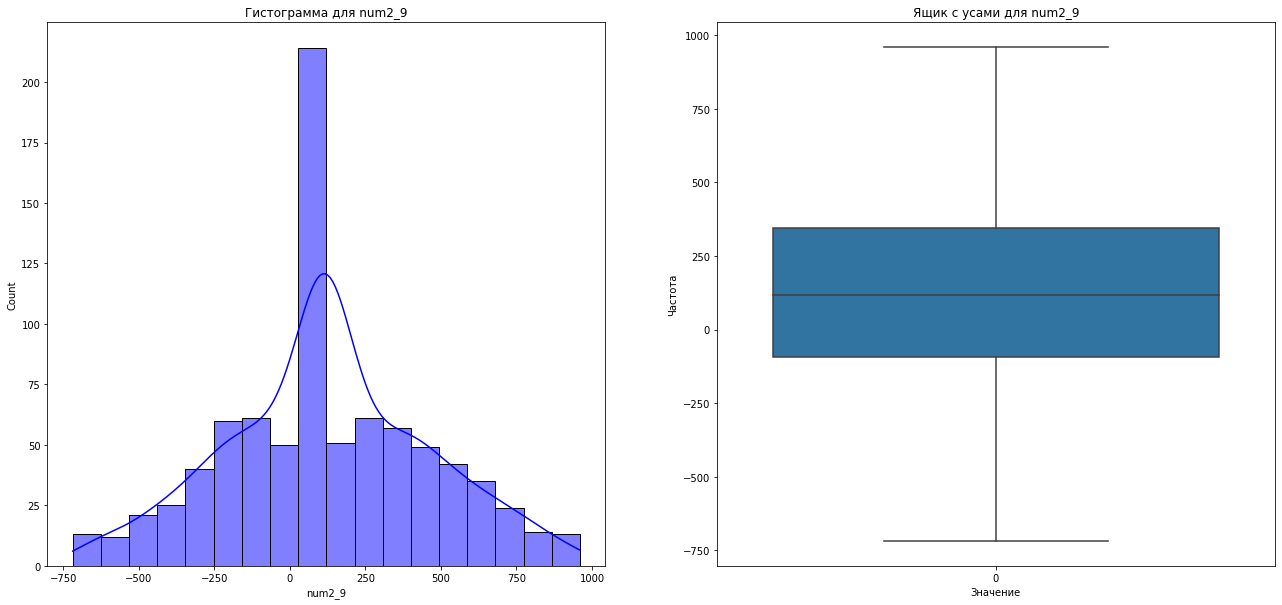

In [104]:
graphs_for_num(df2, 'num2_9')


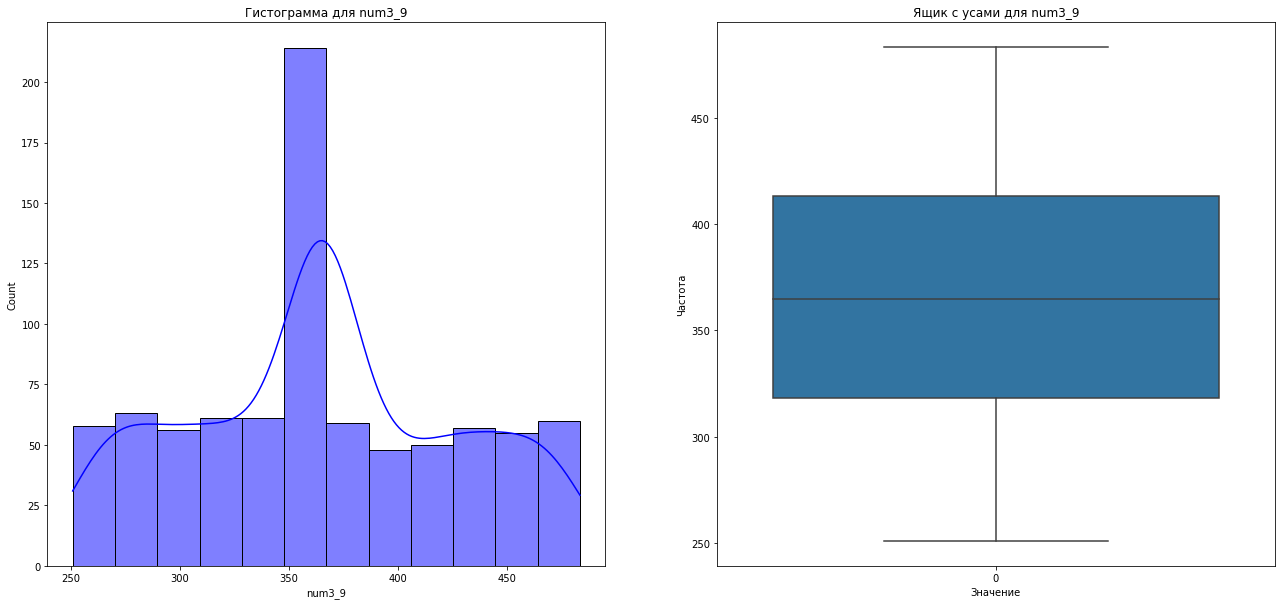

In [105]:
graphs_for_num(df2, 'num3_9')


## –ó–∞–¥–∞–Ω–∏–µ 5. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–ü—Ä–∏–≤–µ—Å—Ç–∏ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–º—É –≤–∏–¥—É. –î–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –∏—Ö –∫–æ–¥–∏—Ä–æ–≤–∫—É. –ü—Ä–∏–º–µ—á–∞–Ω–∏–µ:
–¥–ª—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤—ã–ø–æ–ª–Ω—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é, –¥–ª—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö ‚Äì one-hot encoding (–¥–ª—è –ø–µ—Ä–≤–æ–≥–æ) –∏ label encoding (–¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ). –î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—É—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é sklearn.preprocessing.

In [106]:
lst = df2['cat4_income'].unique().to_list()
lst.sort()

In [107]:
le = LabelEncoder()
df2['Languages'] = le.fit_transform(df2['cat15_programmingLanguage'])

ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(df2[['cat4_income']]).toarray(), columns=lst)
data = df2.join(ohe_data)
data


cat15_programmingLanguage         cat4_income      num1_9      num2_9  \
0                         C++   $40,001 - $50,000   38.394563 -310.892227   
1                         C++   $40,001 - $50,000  275.995928  -68.997463   
2                         C++   $40,001 - $50,000  441.196689  450.783312   
3                         C++       Below $30,001  210.914486  202.884884   
4                         C++       Below $30,001 -285.346725  117.131069   
..                        ...                 ...         ...         ...   
837                       C++  $30,001 - $40,000   127.326414  -13.435502   
838                       C++       Below $30,001  275.995928  770.849704   
839                         C       Below $30,001   70.697187 -150.650042   
840                       C++       Below $30,001  275.995928  117.131069   
841                       C++       Below $30,001  136.169162  365.169535   

         num3_9  Languages  $30,001 - $40,000   $40,001 - $50,000  \
0    475.769166          1                 0.0                1.0   
1    333.541193          1                 0.0                1.0   
2    450.809984          1                 0.0                1.0   
3    442.997016          1                 0.0                0.0   
4    376.479737          1                 0.0                0.0   
..          ...        ...                 ...                ...   
837  423.678672          1                 1.0                0.0   
838  364.984589          1                 0.0                0.0   
839  364.984589          0                 0.0                0.0   
840  364.984589          1                 0.0                0.0   
841  266.644681          1                 0.0                0.0   

     $50,001 and  Below $30,001  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            1.0  
4            0.0            1.0  
..           ...            ...  
837          0.0            0.0  
838          0.0            1.0  
839          0.0            1.0  
840          0.0            1.0  
841          0.0            1.0  

[842 rows x 10 columns]

In [108]:
minmax_scaler = MinMaxScaler()
data[['num1_9', 'num2_9']] = minmax_scaler.fit_transform(data[['num1_9', 'num2_9']])

standard_scaler = StandardScaler()
data[['num3_9']] = standard_scaler.fit_transform(data[['num3_9']])
data

cat15_programmingLanguage         cat4_income    num1_9    num2_9  \
0                         C++   $40,001 - $50,000  0.296730  0.243142   
1                         C++   $40,001 - $50,000  0.492752  0.387174   
2                         C++   $40,001 - $50,000  0.629043  0.696669   
3                         C++       Below $30,001  0.439060  0.549062   
4                         C++       Below $30,001  0.029643  0.498001   
..                        ...                 ...       ...       ...   
837                       C++  $30,001 - $40,000   0.370099  0.420257   
838                       C++       Below $30,001  0.492752  0.887248   
839                         C       Below $30,001  0.323380  0.338555   
840                       C++       Below $30,001  0.492752  0.498001   
841                       C++       Below $30,001  0.377395  0.645692   

           num3_9  Languages  $30,001 - $40,000   $40,001 - $50,000  \
0    1.805570e+00          1                 0.0                1.0   
1   -5.124653e-01          1                 0.0                1.0   
2    1.398785e+00          1                 0.0                1.0   
3    1.271449e+00          1                 0.0                0.0   
4    1.873482e-01          1                 0.0                0.0   
..            ...        ...                 ...                ...   
837  9.565977e-01          1                 1.0                0.0   
838  9.264355e-16          1                 0.0                0.0   
839  9.264355e-16          0                 0.0                0.0   
840  9.264355e-16          1                 0.0                0.0   
841 -1.602746e+00          1                 0.0                0.0   

     $50,001 and  Below $30,001  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            1.0  
4            0.0            1.0  
..           ...            ...  
837          0.0            0.0  
838          0.0            1.0  
839          0.0            1.0  
840          0.0            1.0  
841          0.0            1.0  

[842 rows x 10 columns]